# **Лабораторна робота №1**
## з дисципліни "Інтелектуальний аналіз даних"

##### **За темою:** "Отримання навичок роботи в середовищi Python"

##### **Виконав:** студент групи КА-12 Гавлицький Іван

##### **Перевірила:** Недашкiвська Н.I.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

Нехай $n$ - кiлькiсть альтернативних моделей, $m$ - кiлькiсть показникiв якостi, за якими цi моделi оцiнюються.

In [28]:
N = 4
M = 10

Задано матрицю $W$ значень прiоритетiв або величин виконання альтернатив моделей за показниками, де $w_{i,j} ∈ [0, 1]$ - нормований прiоритет (величина виконання) моделi $i$ за показником $j$ так, що $\sum_{i=1}^n w_{i,j} = 1$ для кожного $j = 1, ..., m$.

In [29]:
W = np.random.rand(N, M)
W /= np.sum(W, axis=0)

print(W)

[[0.48117371 0.09987366 0.16360045 0.08225164 0.09321557 0.03803669
  0.01316211 0.33628369 0.45184948 0.32169218]
 [0.05838804 0.54927165 0.6495215  0.12928009 0.27245811 0.71093631
  0.32852369 0.00875423 0.20776727 0.02878751]
 [0.15816998 0.02491959 0.16745781 0.36676549 0.43880286 0.01913099
  0.4269996  0.23470163 0.30311852 0.54061171]
 [0.30226826 0.3259351  0.01942024 0.42170278 0.19552346 0.23189601
  0.2313146  0.42026046 0.03726473 0.1089086 ]]


Задано також вектор нормованих ваг показників якості $w_j^p ∈ [0, 1], \sum_{j=1}^m w_j^p = 1$.

In [30]:
w = np.random.rand(M)
w /= np.sum(w)

print(w)

[0.02242143 0.05777684 0.19678494 0.13748176 0.05535643 0.04549917
 0.15013048 0.13736463 0.01570609 0.18147823]


Розглянути по черзі кожен показник якості (критерій рішень). Нехай зафіксовано критерій $j$. Зобразимо графічно залежності агрегованих пріоритетів (глобальних ваг) моделей від ваги цього критерію $j$:
1. по осі абсцис вказується значення ваги $w_j^{p*}$ критерію $j$ з діапазону $[0, 1]$, крок дискретизації 0.1 або 0.01
2. по осі ординат $-$ значення агрегованих пріоритетів (глобальних ваг) кожної моделі: $w_i^{aggr} = \sum_{j=1}^m w_{i,j}w_j^{q*}, i = 1, ..., n$, що розраховані для встановленого на кроці $(1)$ значення ваги $w_j^{q*}$
3. червоною вертикальною лінією позначити реальне значення $w_j^p$ ваги показника якості $j$

Визначимо функцію для підрахунку значень агрегованих пріоритетів в кожній точці $w_-aggr(w)$ та функцію яка обчислює відповідне значення у кожній точці дискретизації вісі абсцис критерію $ii - w_-aggr_-vect(x_-set, ii)$

In [31]:
def w_aggr(w):
    w /= np.sum(w)

    return W.dot(w)


def w_aggr_vect(x_set, ii):
    output = np.zeros((x_set.size, N))

    for jj in range(x_set.size):
        w_temp = w.copy()
        w_temp[ii] = x_set[jj]

        output[jj] = w_aggr(w_temp)

    return output

Побудуємо відповідні графіки

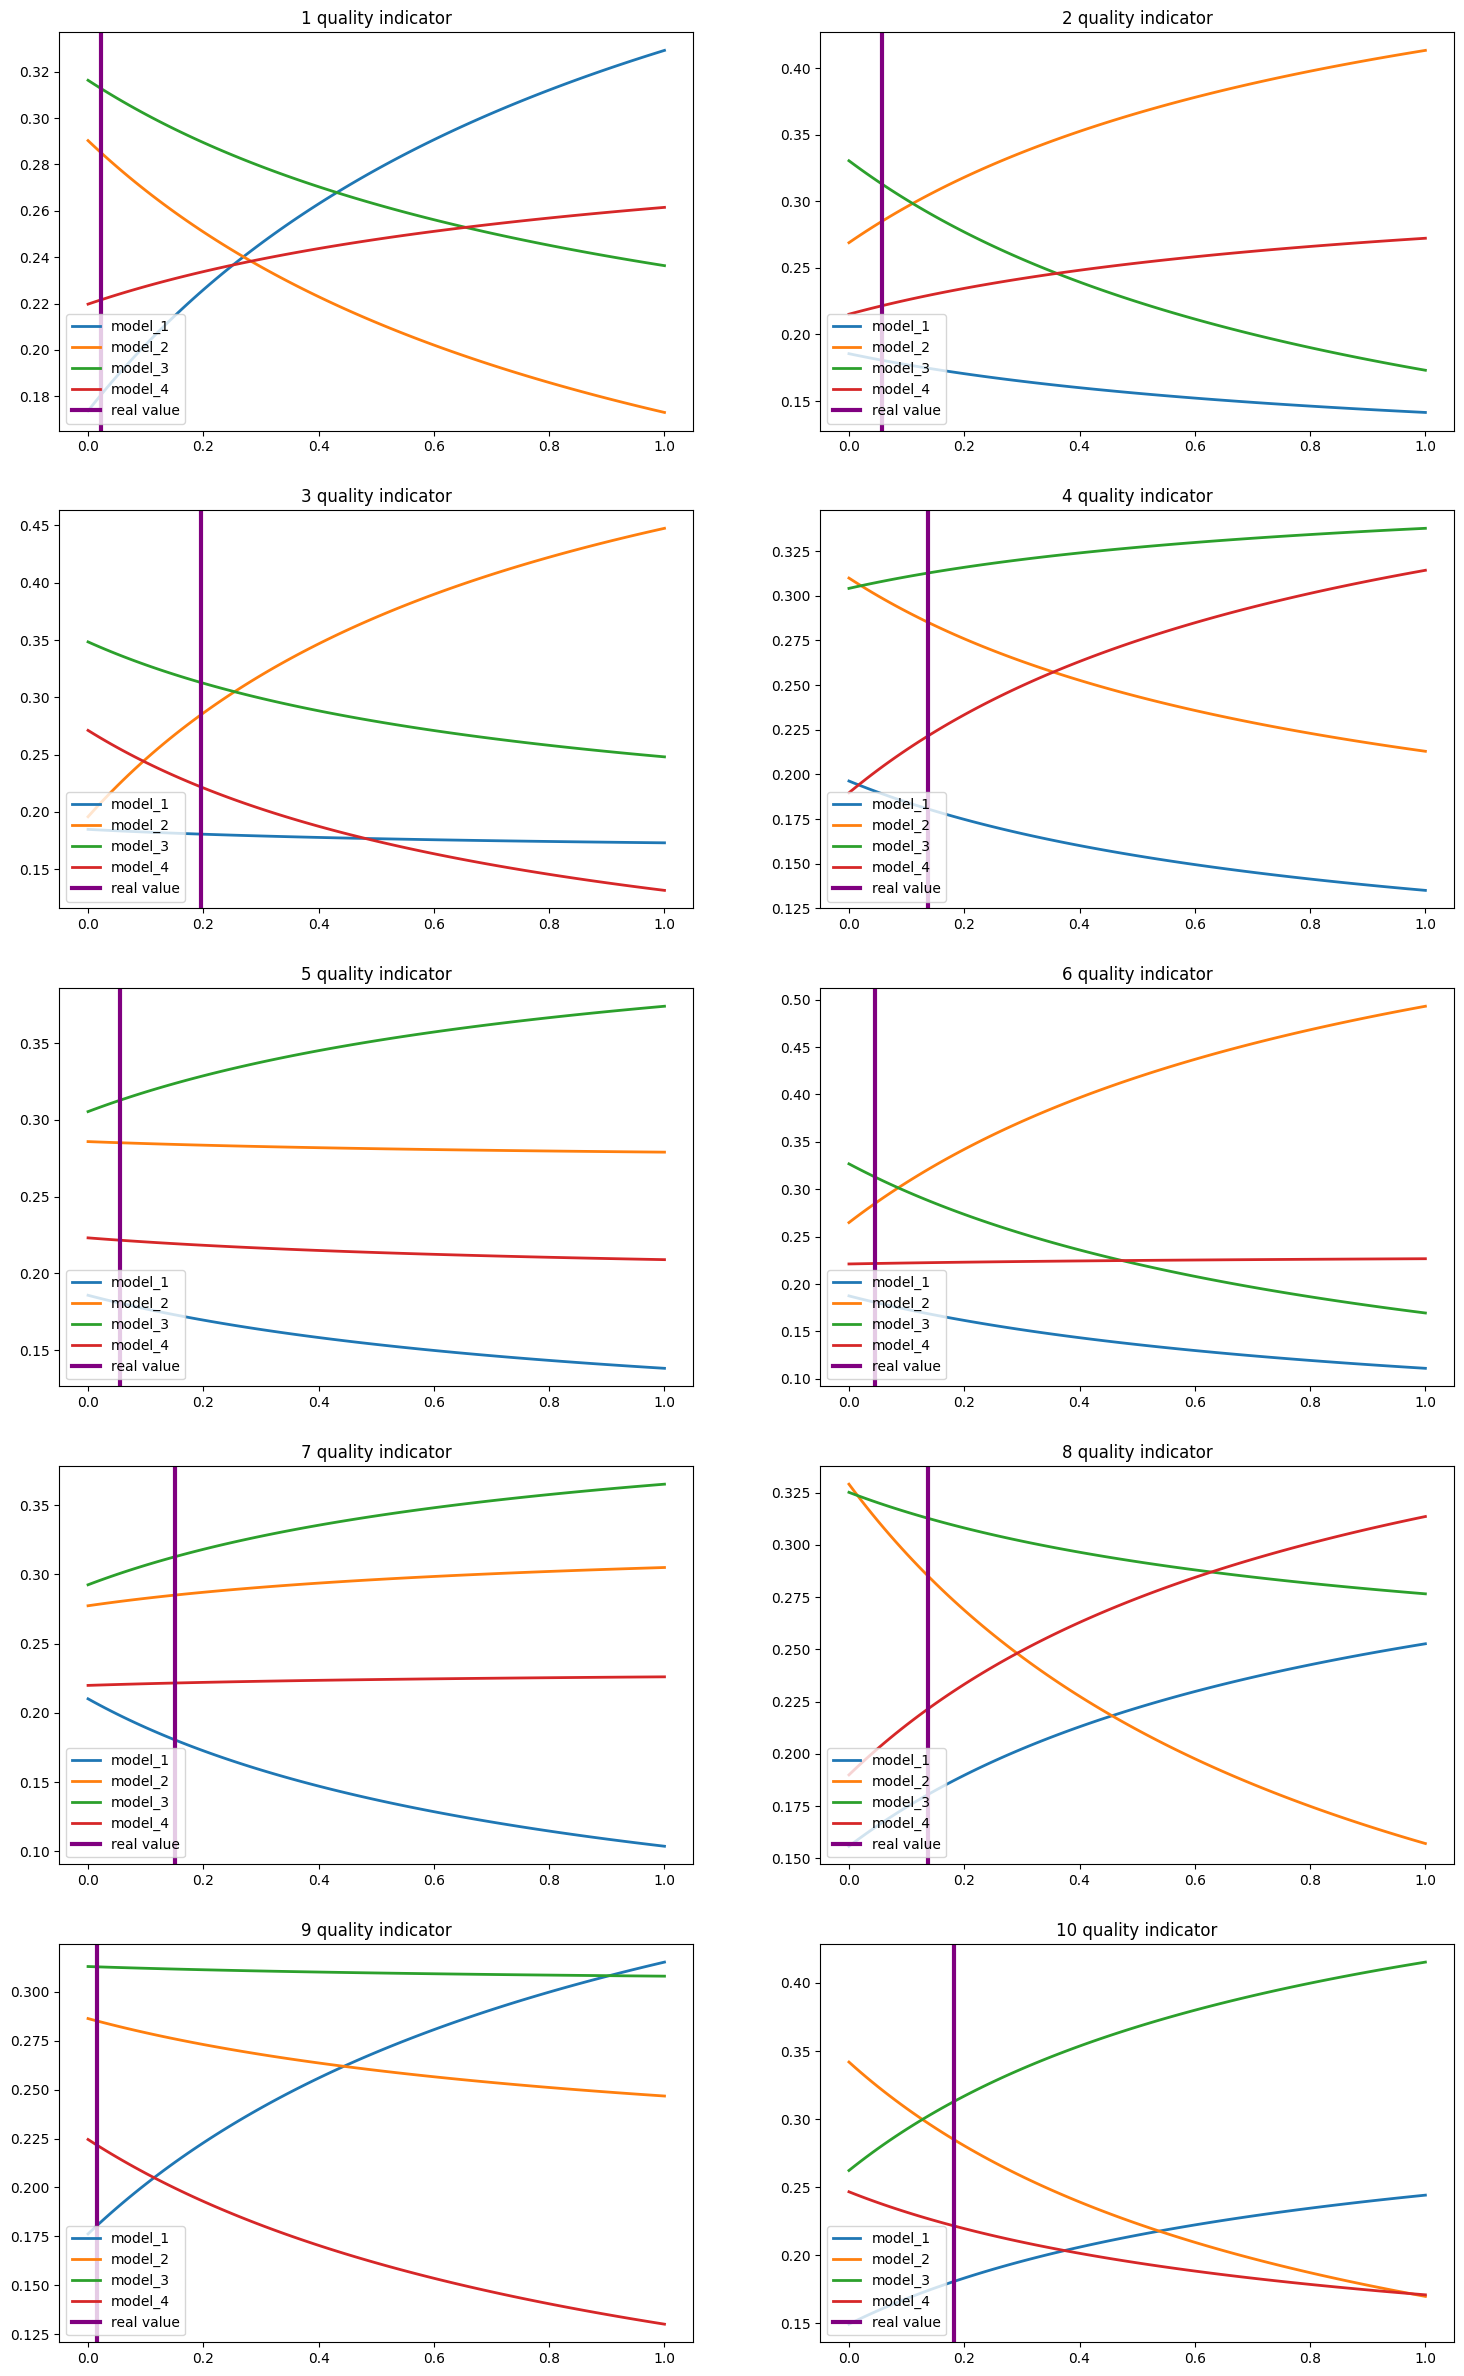

In [32]:
x_set = np.linspace(0, 1, 100)

graph, axs = plt.subplots(int(M/2) + M % 2, 2, figsize  = (18, 30))
axs = axs.flatten()

for ii in range(M):
    for jj in range(N):
        axs[ii].plot(x_set, w_aggr_vect(x_set, ii)[:, jj], linewidth=2, label=f'model_{jj+1}')

    axs[ii].axvline(x = w[ii], color = 'purple', label = 'real value', linewidth=3)

    axs[ii].set_title(f'{ii + 1} quality indicator')
    axs[ii].legend(loc='lower left')